<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II Técnicas Avanzadas</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [2]:
datos = pd.read_csv('dataset.csv', sep=';')

## Ver los datos

In [3]:
datos

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374
...,...,...,...,...
4995,135860,70,0.479357,0.752891
4996,166359,128,8.594487,0.370170
4997,147874,70,0.253138,0.421407
4998,35120,55,8.945226,0.680963


## Verificando el tamaño del dataset

In [4]:
datos.shape
#El DataSet contiene 5000 filas y 4 columnas

(5000, 4)

In [5]:
len(datos) # Número de Registros

5000

# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [6]:
datos.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


Valores mínimos y máximos muy diferentes de los otros estadísticos pueden hacernos sospechar de la presencia de outliers.

## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [7]:
datos.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


De acuerdo a los resultados, se puede inferir que:

- Cuanto mayor es el Área del Inmueble mayor es su valor
- Cuanto más distante esta el Inmueble de la Playa menor es su valor
- Cuanto más distante esta el Inmueble de una Farmacia menor es su valor
Se concluye que las tres variables explicativas no tiene una correlación fuerte entre si. Por tal motivo, es posible trabajar con ellas en el modelo.

Lo que aprendimos:

- Como importar la biblioteca pandas.
- Como leer y ver los datos.
- Como comprobar el tamaño del dataset.
- Como crear una tabla con estadísticos descriptivos de los datos del dataset.
- Como crear una matriz de correlación a partir de los datos de la tabla de estadísticos descriptivos.

# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [8]:
import seaborn as sns

## Configuración del formato de los gráficos

In [9]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent') #Configuración de la paleta de colores
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

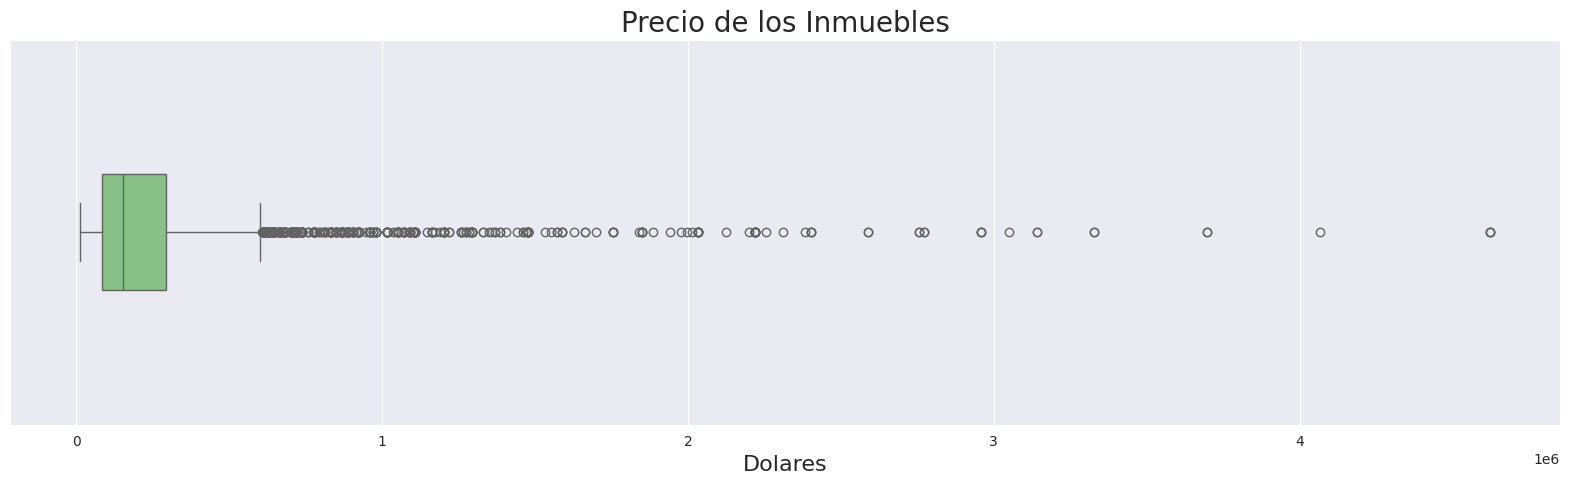

In [10]:
ax= sns.boxplot(data =datos['Valor'], orient='h',width= 00.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
ax

El gráfico muestra asimetria a la derecha y una gran cantidad de outlayers

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<ipython-input-11-498bbae00a84>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos['Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='Precio de los Inmuebles (US$)', ylabel='Density'>

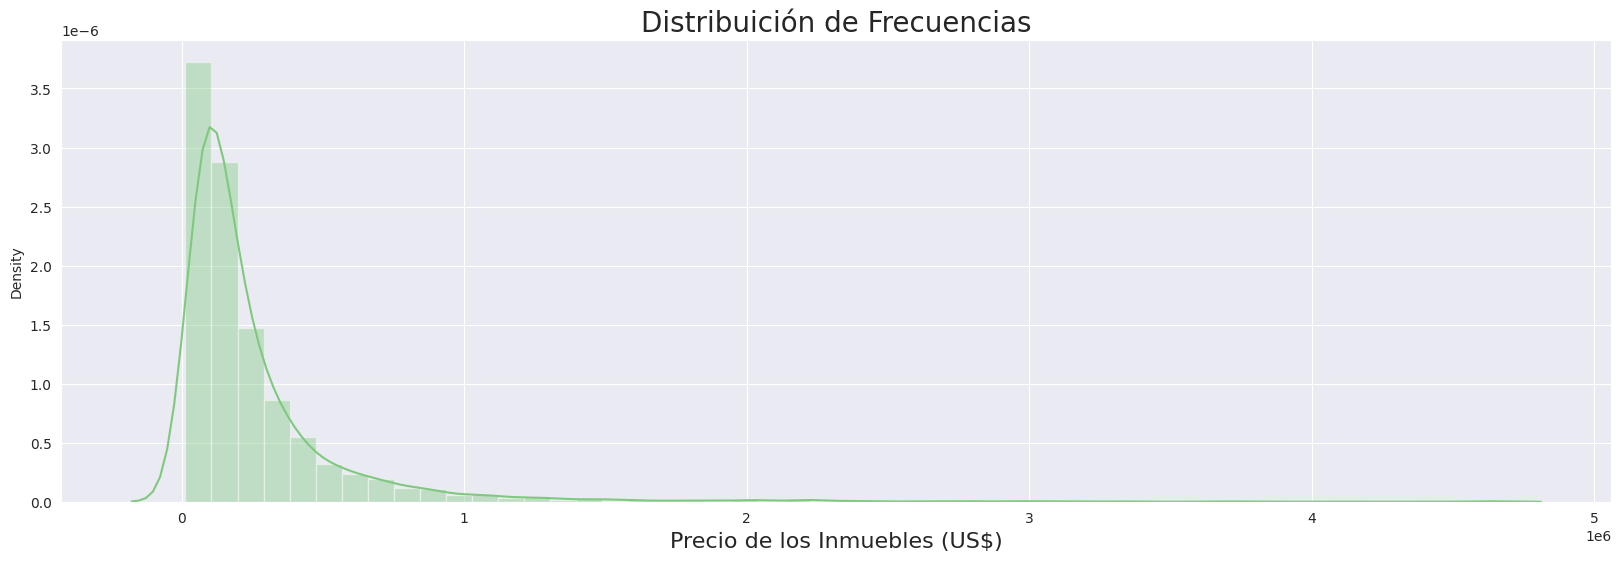

In [11]:
ax = sns.distplot(datos['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
ax

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

El histográma confirma claramenta una distribución asímetrica a la derecha de los datos, esto quiere decir que en la variable 'Valor', existen muhos Inmuebles de bajo precio que es donde mas estan concentrados los datos y pocos Inmuebles con altos precios que es donde menos datos hay. Este comportamiento puede generar problemas en la estimación del modelo, por lo que se requiere realizar una serie de transformaciones para que le distribución busque ser simétrica o con tendencia Normal.

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

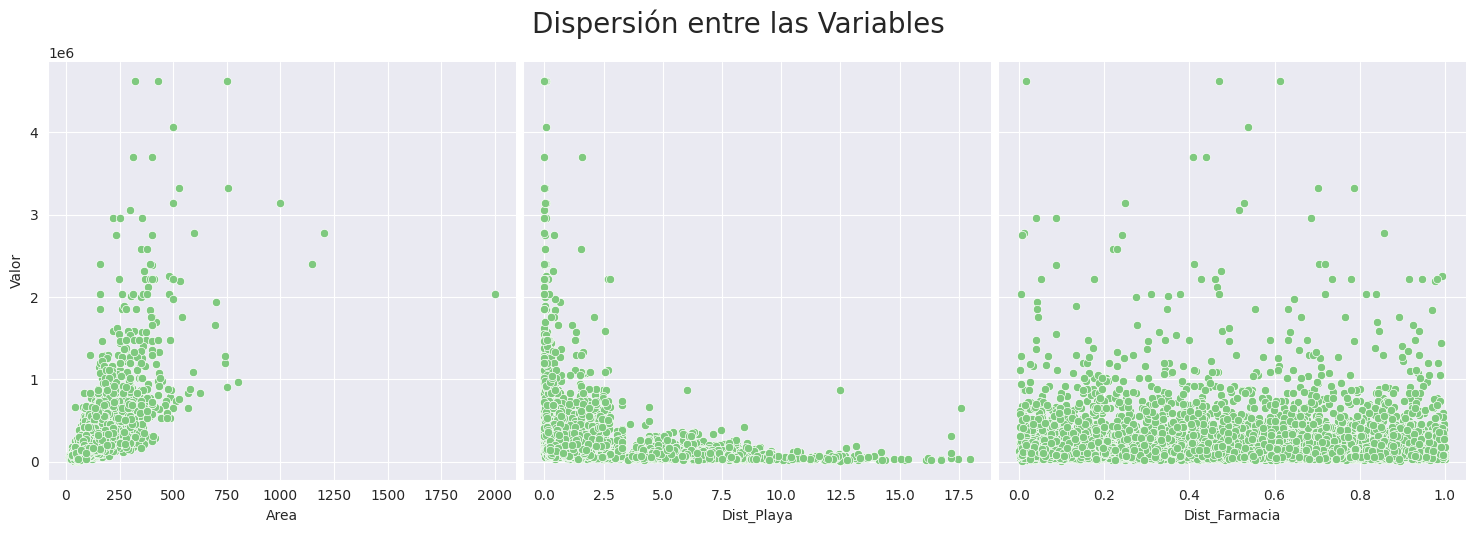

In [12]:
ax= sns.pairplot(datos, y_vars= 'Valor', x_vars= ['Area','Dist_Playa', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

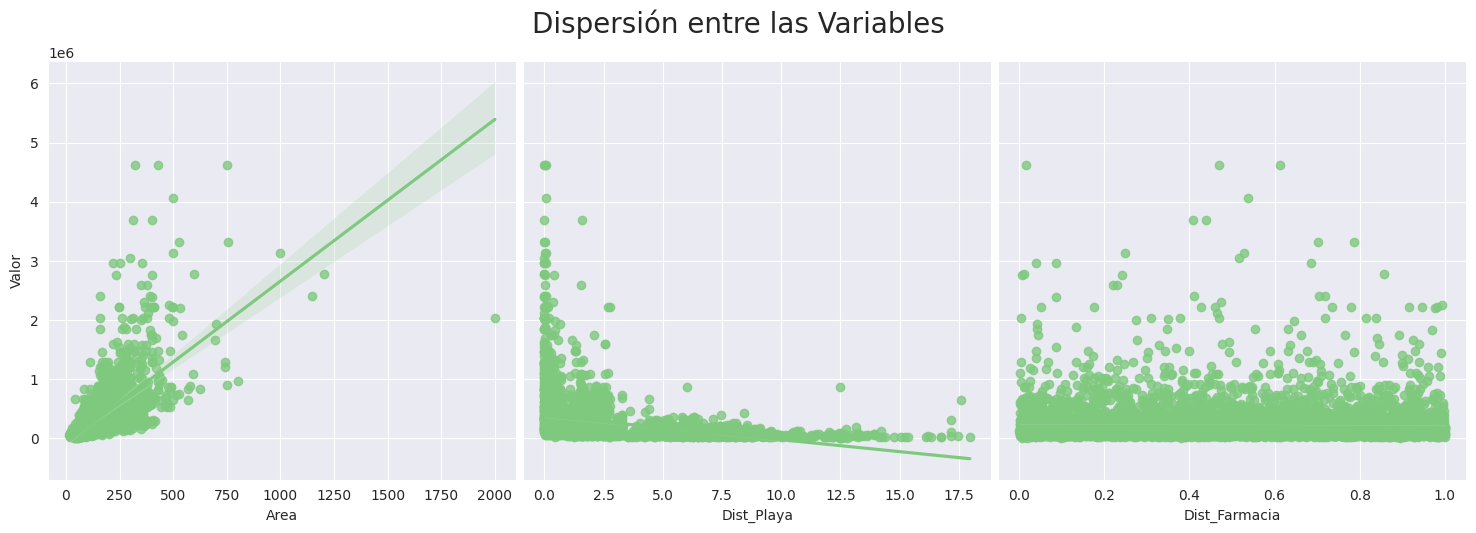

In [13]:
#Se incluye la línea de regresión a los gráficos de dispersión con la función 'kind='reg'
ax= sns.pairplot(datos, y_vars= 'Valor', x_vars= ['Area','Dist_Playa', 'Dist_Farmacia'], height=5, kind='reg')
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

Al observar los resultados, se concluye que la variable Valor no esta muy relacionada con las variables explicativas. Por tanto, no es posible estimar un modelo de regresión líneal. Porlo que se requiere realizar una transformación matemática en los datos.

Lo que aprendimos:

- Como configurar el formato de los gráficos.
- Como construir el box-plot de la variable dependiente.
- Como graficar la distribución de frecuencias de la variable dependiente.
- Como graficar los diagramas de dispersión entre las variables del dataset.
- Análisis de dispersión entre las variables.

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [14]:
import numpy as np

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [15]:
np.log(1)

0.0

**Es importante saber que:**

- Una de las principales razones para transformar algunos tipos de datos es intentar corregir la asimetría que la distribución de los datos pueda presentar.
- El logaritmo de 1 es 0, se admites estos datos
- El logaritmo de 0 es indefinido
- Como la variable tiene valores cero en algunos registros, la forma más correcta de transformación es agregar una constante, diferente de cero, a los datos, para evitar la pérdida de información, ya que log(0) no existe.

Al observar los estadisticos descriptivos,  se evidentcia que  hay variables con valores 0 ('Dist_Playa', 'Dist_Farmacia') por lo que no es posible aplicar el log a estas variables ya que obtendriamos valores indefinidos y el modelo de regresión no permite valores este tipo de valores.

- Para corregir este problema hay que cambiar sus escalas

In [16]:
# Como la Variable Valor y Area no tienen valores 0 en los estadisticso descriptivos es posible aplicar la función log()
datos['log_Valor'] = np.log(datos['Valor'])
datos['log_Area'] = np.log(datos['Area'])

# Como la Variable 'Dist_Playa', 'Dist_Farmacia tienen valores 0 en los estadisticso descriptivos No es posible aplicar la función log() por lo que se deb cambiar la escala agregando 1
datos['log_Dist_Playa'] = np.log(datos['Dist_Playa']+1)
datos['log_Dist_Farmacia'] = np.log(datos['Dist_Farmacia']+1)
# Ahora los valores 0 seran = 1

In [17]:
#Se confirma que las valriables Log() se hayan creado
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,850277,280,0.240925,0.793637,13.653317,5.634790,0.215857,0.584245
1,166359,208,0.904136,0.134494,12.021903,5.337538,0.644028,0.126187
2,471349,170,0.059525,0.423318,13.063354,5.135798,0.057821,0.352991
3,101664,100,2.883181,0.525064,11.529429,4.605170,1.356655,0.422036
4,406654,164,0.239758,0.192374,12.915718,5.099866,0.214916,0.175946


## Distribuición de frecuencias de la variable *dependiente transformada* (y)

<ipython-input-18-741ddcb03647>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(datos['log_Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='log del Precio de los Inmuebles', ylabel='Density'>

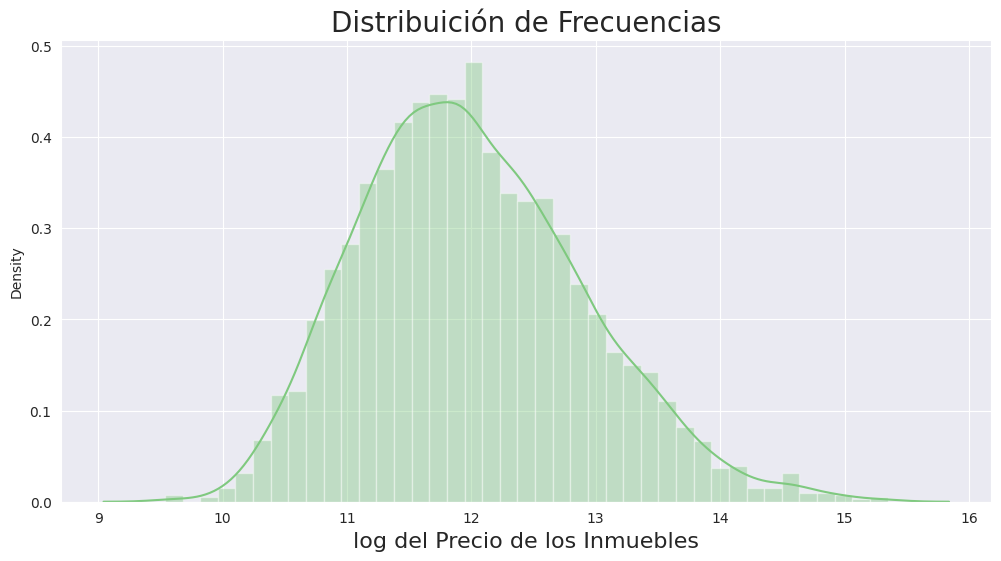

In [18]:
#Confirmamos que la asimetria haya mejorado con la transformación logarítmica de los datos
ax= sns.distplot(datos['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

Como resultado se observa que la distribución de los datos tiende a una distribución Normal

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

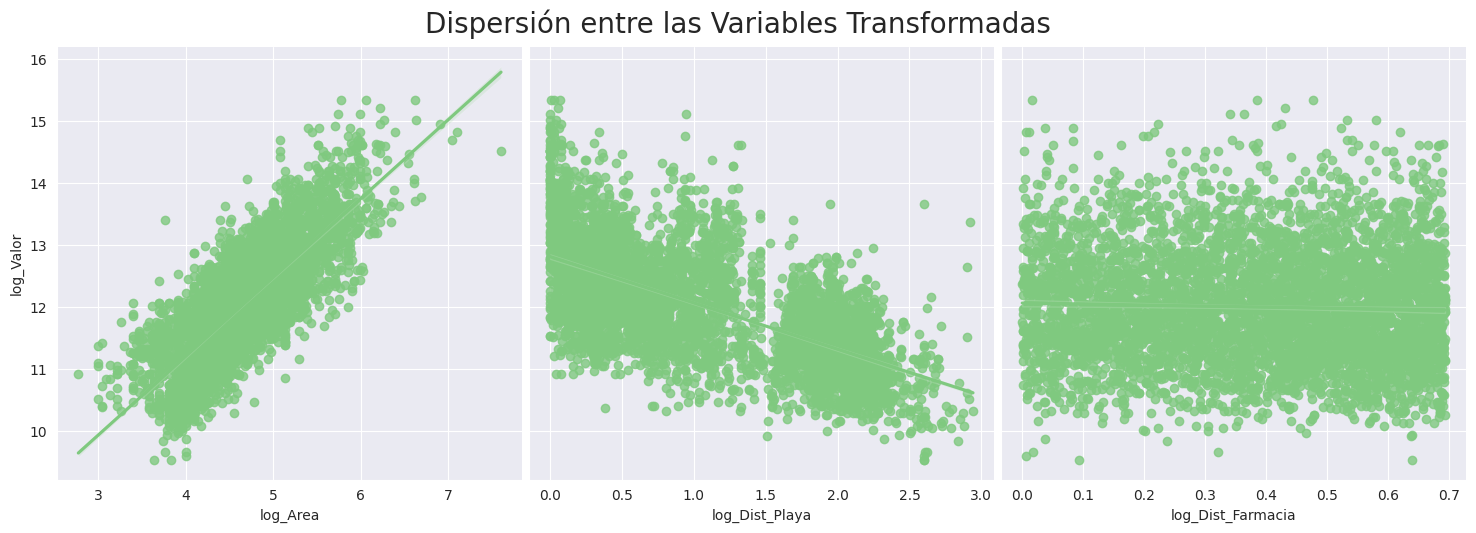

In [19]:
#Se incluye la línea de regresión a los gráficos de dispersión con la función 'kind='reg' de las variables logarítmicas
ax= sns.pairplot(datos, y_vars= 'log_Valor', x_vars= ['log_Area','log_Dist_Playa', 'log_Dist_Farmacia'], height=5, kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax

El grafico muestra:
- Una relación lineal positiva entre log_Valor y log_Area
- Una relación lineal menos fuerte y negativa entre log_Valor y log_Dist_Playa
- No se observa una relación lineal menos  entre log_Valor y log_Dist_Farmacia, pues su tendencia es constante, probablemente esta variable sea eliminada del modelo.

Ahora que se cuenta con relaciones más lineales es posible estimar el modelo de regresión.

Lo que aprendimos:

- Como aplicar la transformación logarítmica a los datos del dataset.
- Como graficar la distribución de frecuencias de la variable dependiente transformada.
- Como graficar los diagramas de dispersión entre las variables transformadas del dataset.
- Cómo analizar la dispersión entre las variables transformadas.


# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [20]:
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [21]:
y= datos['log_Valor']
y

,log_Valor
0,13.653317
1,12.021903
2,13.063354
3,11.529429
4,12.915718
...,...
4995,11.819380
4996,12.021903
4997,11.904116
4998,10.466526


## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [22]:
x=datos[['log_Area','log_Dist_Playa', 'log_Dist_Farmacia']]
x

,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,5.634790,0.215857,0.584245
1,5.337538,0.644028,0.126187
2,5.135798,0.057821,0.352991
3,4.605170,1.356655,0.422036
4,5.099866,0.214916,0.175946
...,...,...,...
4995,4.248495,0.391608,0.561266
4996,4.852030,2.261189,0.314935
4997,4.248495,0.225651,0.351647
4998,4.007333,2.297093,0.519367


La técnica de separar aleatoriamente un dataset en dos conjuntos distintos (conjuntos de entrenamiento y de prueba), estimar el modelo con datos de uno de estos conjuntos (conjunto de entrenamiento) y luego realizar predicciones con datos del segundo conjunto (conjunto de prueba), es una técnica ampliamente utilizada en data science para confirmar la efectividad de los modelos estimados.

La funcionalidad de scikit-learn que usamos para realizar dicha separación de datos es 'train_test_split()'

## Creando los datasets de entrenamiento y de prueba

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 2811) #como tenemos 5000 observaciones seleccionamos el 20% para el conjunto de prueba y el 80% para el conjunto de entrenamiento

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

statsmodels es una biblioteca en Python que se utiliza para la estimación de modelos estadísticos, la realización de pruebas estadísticas y la evaluación de la validez de los modelos. Es especialmente útil en el contexto del análisis de datos y la econometría. Proporciona herramientas para ajustar modelos de regresión, realizar pruebas de hipótesis, y calcular estadísticas de resumen, entre otras cosas.

Principales usos de statsmodels:
Regresión lineal y otros modelos estadísticos:

statsmodels proporciona herramientas para ajustar modelos de regresión, tanto lineales como no lineales. Por ejemplo:
Regresión lineal: Para predecir una variable dependiente usando una o más variables independientes.
Regresión logística: Para modelar relaciones entre variables cuando la variable dependiente es binaria (0 o 1).
Modelos de series temporales: Modelos como ARIMA, SARIMA, entre otros, para trabajar con datos de series temporales.
Modelos de efectos fijos y aleatorios: Útil para análisis de datos en panel (por ejemplo, datos de diferentes países a lo largo de varios años).
Estadísticas de resumen y pruebas de hipótesis:

statsmodels permite calcular estadísticas descriptivas como media, desviación estándar, etc.
Además, puedes realizar pruebas estadísticas como la prueba t, prueba F, prueba de normalidad, test de bondad de ajuste (como el test de Jarque-Bera) y muchas otras.
Análisis de la varianza (ANOVA):

Se pueden realizar análisis de la varianza para comparar las medias de varios grupos y determinar si existen diferencias significativas entre ellos.
Modelos de regresión múltiple:

statsmodels permite ajustar modelos de regresión donde hay múltiples variables predictoras, lo que es útil en problemas complejos donde no solo una variable afecta a la variable de respuesta.
Pruebas de diagnóstico y validación de modelos:

La biblioteca también permite realizar pruebas de diagnóstico en los modelos ajustados, como verificar la homocedasticidad, la multicolinealidad y la normalidad de los residuos, lo cual es crucial para asegurar que el modelo sea válido.
Modelos Generalizados (GLM):

statsmodels ofrece la posibilidad de trabajar con modelos lineales generalizados (GLM), que permiten modelar distribuciones de probabilidad más flexibles para las variables dependientes (por ejemplo, distribuciones binomial, Poisson, Gamma).

In [24]:
import statsmodels.api as sm

## Estimando el modelo con statsmodels

In [25]:
x_train_con_constante= sm.add_constant(X_train)

In [26]:
#Se añade una columna 'const' en la DataSet
x_train_con_constante

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


Añadir una constante (también conocida como intercepto) en un modelo de regresión lineal es fundamental por varias razones. La constante representa el valor de la variable dependiente cuando todas las variables independientes tienen valor cero. Es decir, captura el punto de intersección de la recta de regresión con el eje Y, cuando todas las otras variables en el modelo tienen un valor igual a cero.

In [27]:
# Se añade'asconst= True' para indicar que la constante fue añadida al modelo
# Se añade 'fit()' para estimar los coeficientes
modelo_statsmodels = sm.OLS(y_train, x_train_con_constante, hasconst= True).fit()  # ordinary least square (OLS) es el modelo de Minimos Cuadrados Ordinarios

# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [28]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:01:38   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06

- Como resultado se cuenta con un R2 de 80.5%
- R2 Ajustado a los grados de libertad 80.5%. Si se agregan variables poco significativas a la explicación de la variable dependiente, el modelo pierde grados de libertad y calidad por lo que el Adj. R-squared disminuirá. Caso contrario, si las variables son significativas este aumentará.
- Se observa la estimación de los coeficientes
- Se observa el calculo de los criterioes de información
- se observa el test (f) y el test (t).


**Evaluación de la prueba F:**

La prueba F se utiliza para evaluar si el modelo de regresión en su conjunto es significativo, es decir, si al menos una de las variables independientes tiene un efecto significativo sobre la variable dependiente.

Resultados clave para la prueba F:
F-statistic: 5495
Prob (F-statistic): 0.00
La hipótesis nula de la prueba F es que ninguna de las variables independientes tiene un efecto significativo sobre la variable dependiente (es decir, todos los coeficientes son cero). En cambio, la hipótesis alternativa sostiene que al menos una de las variables tiene un efecto significativo.

**Interpretación de la prueba F:**

El valor F es 5495, lo que es muy alto, y el valor p asociado con el estadístico F es 0.00 (muy pequeño, menor que el umbral común de significancia de 0.05). Esto indica que rechazamos la hipótesis nula de que todos los coeficientes son cero.
Esto sugiere que al menos una de las variables independientes en el modelo es significativa, es decir, el modelo en su conjunto es útil para predecir la variable dependiente (log_Valor).
Conclusión: El modelo es significativo en su totalidad.

**Evaluación de la prueba t: **

La prueba t se utiliza para evaluar si cada uno de los coeficientes individualmente es significativamente diferente de cero, es decir, si cada variable independiente tiene un efecto significativo sobre la variable dependiente.

**Hipótesis nula y alternativa para la prueba t:**

- Hipótesis nula (para cada variable):
𝐻
0
:
𝛽
𝑖
=
0
H
0
​
 :β
i
​
 =0, es decir, la variable independiente no tiene un efecto significativo.
- Hipótesis alternativa:
𝐻
1
:
𝛽
𝑖
≠
0
H
1
​
 :β
i
​
 
=0, es decir, la variable independiente tiene un efecto significativo.

**Interpretación de los resultados de la prueba t:**

1. log_Area:

Coeficiente: 1.0580
t-valor: 89.320
P>|t|: 0.000
El valor p es 0.000, lo que indica que rechazamos la hipótesis nula y concluimos que log_Area tiene un efecto significativo sobre log_Valor.

2. log_Dist_Playa:

Coeficiente: -0.4905
t-valor: -56.690
P>|t|: 0.000
El valor p es 0.000, lo que indica que rechazamos la hipótesis nula y concluimos que log_Dist_Playa tiene un efecto significativo sobre log_Valor.

3. log_Dist_Farmacia:

Coeficiente: -0.0167
t-valor: -0.521
P>|t|: 0.603
El valor p es 0.603, que es mayor que 0.05. Esto sugiere que no rechazamos la hipótesis nula y concluimos que log_Dist_Farmacia no tiene un efecto significativo sobre log_Valor.






# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

Como log_Dist_Farmacia no tiene un efecto significativo sobre log_Valor, creamos un nuevo modelo sin incluir esta variable.

## Creando un nuevo conjunto de variables explicativas (X)

In [29]:
x=datos[['log_Area','log_Dist_Playa']]

## Creando los datasets de entrenamiento y de prueba

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 2811)

## Estimando el modelo con el statsmodels

In [31]:
x_train_con_constante= sm.add_constant(X_train)

In [32]:
modelo_statsmodels = sm.OLS(y_train, x_train_con_constante, hasconst= True).fit()

## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [33]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:01:39   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6467      0.059    129.

Ahora taonto el Test F como el Test t son significativos. Por tanto, log_Area  y log_Dist_Playa  son estadisticamente significativos en la explicación de log_Valor.

Lo que aprendimos:

- Como preparar los datos y crear los datasets de entrenamiento y prueba.
- Como estimar el modelo de regresión lineal.
- Como analizar las estadísticas de prueba del modelo.
- Como modificar el modelo y ver el ajuste.

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando la clase *LinearRegression()*

In [36]:
modelo = LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [37]:
modelo.fit(X_train, y_train)

LinearRegression()

sklearn No calcula todos los indicadores de statsmodels

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [43]:
# Este R² será el mismo de la Tabla calculada por statsmodels
print('R² ={}'.format(round(modelo.score(X_train,y_train), 3)))

R² =0.805


## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [45]:
y= y_predicho= modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [48]:
# Ahora comparamos y_predicho con y_test, para ello se calcula otro R²'
print('R² ={}'.format(round(metrics.r2_score(y_test, y_predicho), 3)))

R² =0.79


Este resultado es muy proximo al R² que mide el ajuste al modelo, lo que indica que vamos por  buen camino.
El modelo es capaz de producir prediciones cercanas a los precios de los inmuebles

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [49]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Playa
1006,5.273,1.282769


## Generando predicción puntual

In [50]:
modelo.predict(entrada)[0]

12.596570808197772

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [51]:
#Predicción en Dolares al aplicar un exponencial a los datos
np.exp(modelo.predict(entrada)[0])

295543.35077471804

## Creando un simulador simple

In [53]:
Area = 150
Dist_Playa =1
#Pasamos a escala logaritmica los datos
entrada= [[np.exp(Area), np.exp(Dist_Playa+1)]]

print('US$ {} '.format(round(modelo.predict(entrada)[0], 2)))

US$ 1.4746535361938068e+65 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

In [54]:
#El intercepto es el mismo valor de la Tabla de statsmodels
modelo.intercept_

7.646667897902708

In [55]:
np.exp(modelo.intercept_)
#El Valor de B1 en Dolares es de:

2093.657672537765

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

In [56]:
#Para ver los coeficientes del modelo
modelo.coef_

array([ 1.05807806, -0.49061238])

## Confirmando el orden de las variables explicativas en el DataFrame

In [57]:
x.columns

Index(['log_Area', 'log_Dist_Playa'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [58]:
index =['intercepto', 'log Área', 'log Distancia ala playa']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [59]:
pd.DataFrame(np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parámetros'])

,Parámetros
intercepto,7.646668
log Área,1.058078
log Distancia ala playa,-0.490612


## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

En conclusión: Manteniendo constante el valor del área, un aumento del 1% en la distancia de un inmueble a la playa genera, en promedio, un aumento del 1.06% en el precio del inmueble.

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [60]:
y_predicho_train = modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Predicción X Real'}, xlabel='log del Precio - Predicción', ylabel='log del Precio - Real'>

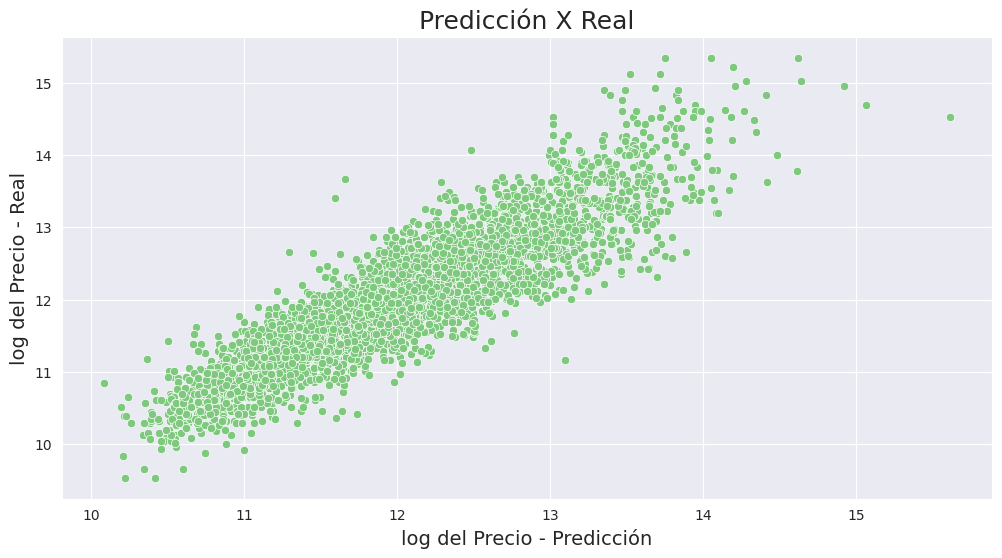

In [61]:
ax=sns.scatterplot(x= y_predicho_train, y= y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

El Gráfico indica que los puntos estan ajustados a su media. Cuanto menos dispersos los puntos o más siguen la linea, hay menos errores en las estimaciones. los resultados son razonablemente buenos, sin emargo.Para los inmueblres con  precios más altos hay una mayor dispersión. eso puede deberse a problemas de asimetria en los datos originales, sobre todo por los muebles de lujo.

## Obteniendo los residuos

In [62]:
#Calculo de los residuos
residuo= y_train - y_predicho_train
residuo

,log_Valor
2661,0.632221
912,0.103173
3042,-0.201266
141,0.798453
3854,0.099376
...,...
3657,0.103409
979,0.222693
2389,-0.232010
447,-0.246478


## Graficando la distribuición de frecuencias de los residuos

<ipython-input-64-dff3dc3bf50f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(residuo)


<Axes: title={'center': 'Distribuición de Frecuencias de los Residuos'}, xlabel='log del Precio', ylabel='Density'>

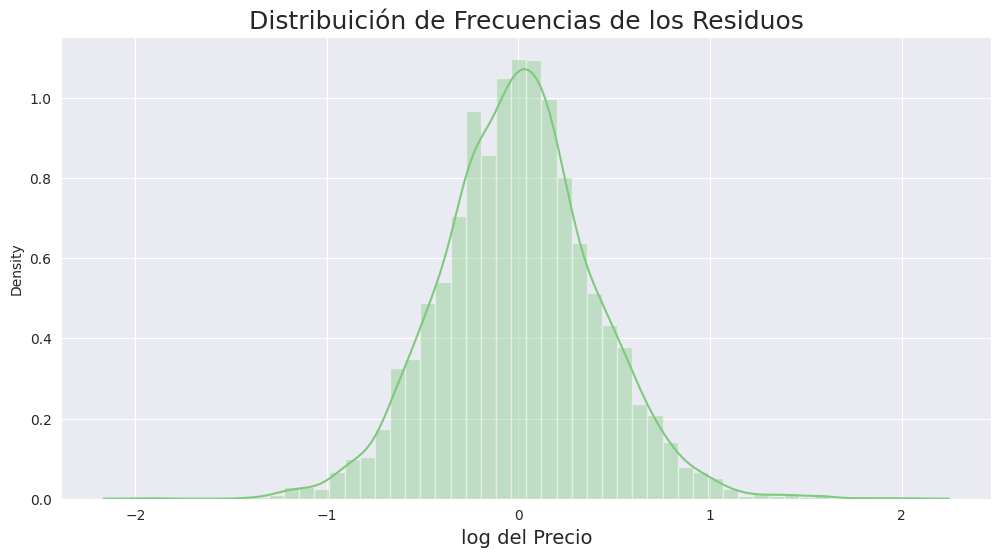

In [64]:
#Graficamos el Histograma de los Residuos
ax=sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax

La distribución de los residuos tiene una tendencia a la distribución Normal.

Acerca de los resultados de la estimación, considere las siguientes afirmaciones:

- Los residuos del modelo se obtienen restando el valor observado de la variable dependiente (valor real) y el valor predicho por el modelo.

- Para graficar la distribución de frecuencia de los residuos, podemos usar la función distplot() de la biblioteca seaborn.

- Cuando graficamos la dispersión entre el valor real de la variable dependiente y los valores predichos por el modelo, esperamos encontrar una relación lineal bien ajustada (recta).

Lo que aprendimos:

- Como estimar el modelo lineal utilizando los datos de entrenamiento
- Como obtener el coeficiente de determinación (R²) del modelo estimado
- Como generar las predicciones para los datos de prueba del modelo
- Como obtener el coeficiente de determinación (R²) para las predicciones del modelo
- Como generar la predicción puntual del modelo
- Como invertir la transformación para obtener la estimación en dólares
- Como crear un simulador simple
- Como obtener el intercepto del modelo
- Como obtener los coeficientes de regresión
- Como crear un DataFrame para almacenar los coeficientes del modelo
- Como interpretar los coeficientes estimados
- Como analizar gráficamente los resultados del modelo